In [1]:
import pandas as pd
from datetime import datetime

In [2]:
# View the dataset format
df = pd.read_csv('USDC Price.csv')
df

,Date,USDC Price
0,2018-10-08,1.002210
1,2018-10-09,1.006860
2,2018-10-10,1.009620
3,2018-10-11,1.009780
4,2018-10-12,1.012720
...,...,...
919,2021-04-14,0.999534
920,2021-04-15,0.999178
921,2021-04-16,0.999518
922,2021-04-17,0.999383


In [3]:
# Set Date as new index for later graph drawing and prevent too many date label in x-axis
df1 = df.reset_index(drop = True).set_index('Date')
df1 = df1.asfreq('D')
df1

,USDC Price
Date,
2018-10-08,1.002210
2018-10-09,1.006860
2018-10-10,1.009620
2018-10-11,1.009780
2018-10-12,1.012720
...,...
2021-04-14,0.999534
2021-04-15,0.999178
2021-04-16,0.999518


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

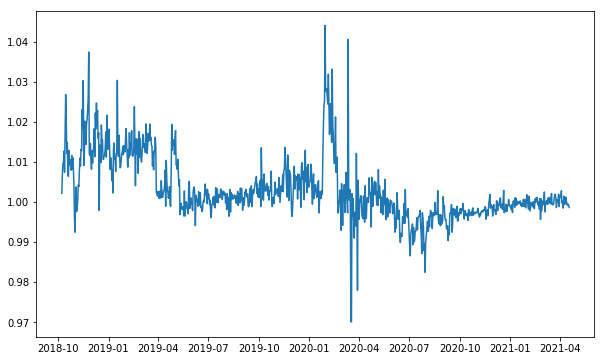

In [5]:
# Time Series Plot, historical 3yr data 
plt.rcParams['figure.figsize'] = (10,6)
df1['USDC Price'] = df1['USDC Price'].astype('float64')
plt.plot(df1['USDC Price'])
plt.show()

In [6]:
# Calculate Mean Absolute Percentage Error
def get_mape(actuals, forecasts):
    MAPE = np.sum(abs(forecasts-actuals)/actuals)/len(actuals)
    return MAPE

In [8]:
# Seperate data into training part and testing part
train = df1[df1.index <= '2020-12-31']
test = df1[df1.index >= '2021-01-01']

In [9]:
# Change price type from string to float
train['USDC Price'] = train['USDC Price'].astype('float64')
test['USDC Price'] = test['USDC Price'].astype('float64')

In [10]:
import time

1.0880756378173828
0.03298020362854004


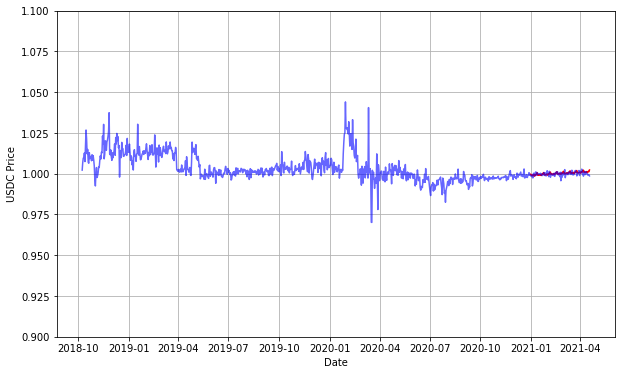

In [89]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define model and tune parameter
model_sarimax = SARIMAX(train['USDC Price'], order=(0,1,1), seasonal_order=(1,1,1,12))

# Fit model and calculate running time
start = time.time()
model_sarimax_fit = model_sarimax.fit()
end = time.time()
print(end - start)

# Create forecasts
start1 = time.time()
sarima_pred = model_sarimax_fit.forecast(108)
end1 = time.time()
print(end1 - start1)

# Plot forecast, test set, and training set
plt.plot(sarima_pred, c = 'r')
plt.plot(df1['USDC Price'], c = 'b',alpha = 0.6)
plt.ylim([0.9, 1.1])

plt.xlabel("Date")
plt.ylabel("USDC Price")

plt.grid()

In [90]:
# Calculate SARIMA MAPE value
sarima_mape = get_mape(test['USDC Price'], sarima_pred)

print('USDC SARIMA MAPE: ', sarima_mape)


USDC SARIMA MAPE:  0.000998695833506844


In [78]:
# View summary especially AIC value, but not rely on this
model_sarimax_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         USDC Price   No. Observations:                  816
Model:             SARIMAX(0, 1, 1)x(1, 0, 0, 12)   Log Likelihood                3237.319
Date:                            Fri, 30 Apr 2021   AIC                          -6468.638
Time:                                    15:52:45   BIC                          -6454.528
Sample:                                10-08-2018   HQIC                         -6463.222
                                     - 12-31-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5199      0.013    -38.695      0.000      -0.546      -0.494
ar.S.L12       0.0994      0.023      4.348      0.000       0.055       0.144
sigma2      2.075e-05   3.83e-07     54.237      0.000       2e-05    2.15e-05
===================================================================================
Ljung-Box (Q):                       78.49   Jarque-Bera (JB):              6125.25
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                             0.68
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""